In [1]:
import pandas as pd
import numpy as np

# 0. Intro

1. pands.dataframe 클래스 구조
    * class pandas.DataFrame(data=None, index=None, columns=None, copy=None)
    * 생성된 인스턴스 = 크기의 변경이 가능한 2차원 배열 (Series = 1차원)
    * data : ndarray, lterable, dict, DataFrame
        - dict : series, 배열(array) list와 유사한 오브젝트
        - 데이터가 dict인 경우 열(columns)의 순서는 삽입 순서를 따릅니다.
    * index : 인덱스 or 배열형태의 객체
        - 인스턴스에 설정되는 행 레이블
        - 입력하지 않으면 기본 인덱스 설정됨.
    * columns : 인덱스 또는 배열형태의 객체
        - 인스턴스에 설정되는 열 레이블
        - 입력하지 않으면 기본 인덱스 설정됨.
    * dtype : dtype 데이터 유형을 강제하고자 할 때 값
        - 기본값은 None
        - None일 경우 type이 자동으로 추론된다.
    * copy : bool
        - True일 경우 DataFrame의 원본 데이터를 수정하더라고 인스턴스가 변경되지 않지만 
        - False일 경우 원본 데이터를 수정할 시 인스턴스의 값도 바뀌게 된다. 

In [2]:
np.random.seed(0) # 난수를 예측가능하도록 만든다. 0부터 시작한다
# seed : 어떤 특정한 시작 숫자를 정해주면 컴퓨터가 정해진 알고리즘에 의해 마치 
# 난수처럼 보이는 수열 생성하는데 이때 시작 숫하는 시드(seed)
arr = np.random.randint(10, size=(2,2)) #2x2 짜리 random array 생성 
print(arr)

[[5 0]
 [3 3]]


In [3]:
df1 = pd.DataFrame(arr, copy=False) #False니까 원본데이터 수정하면 인스턴스 값 바뀜
df2 = pd.DataFrame(arr, copy=True) # True니까 DataFrame의 원본 데이터 수정해도 인스턴스 변경이 안된다.

In [4]:
arr[0,0]=99
print(df1) # 변경됨.

    0  1
0  99  0
1   3  3


In [5]:
print(df2) #변경되지 않음.

   0  1
0  5  0
1  3  3


In [6]:
# dictionary로 만들기
data = {'A' : [1,2], 'B':[3,4]} # 각각 'A','B'는 열이 된다.
df = pd.DataFrame(data = data)
print(df)

   A  B
0  1  3
1  2  4


In [7]:
# index, columns 설정
data=np.array([[1,2], [3,4]])
df = pd.DataFrame(data=data, index=['row1', 'row2'], columns=['col1','col2'])
print(df)

      col1  col2
row1     1     2
row2     3     4


# 1.객체 간 연산

1-1. 덧셈(add, radd)
- DataFrame.add(other, axis='columns', level=None, fill_value=None)
- DataFrame.radd(other, axis='columns', level=None, fill_value=None)
* add함수는 dataframe에 다른 데이터프레임이나, series, 스칼라 등 데이터를 더하는 메서드
* df + 다른df 과 차별되는 것은 fill_value인수를 통해 계산 불가한 값을 채워 넣는다.
* radd : add의 경우에서 순서만 바꾼 것 add : df1 + df2, radd : df2+df1
* other : 데이터프레임이나, series, 스칼라 등의 데이터가 온다. 더할 값
* axis : 더할 레이블 0=행, 1=열
* level : multiIndex 에서 계산할 Index의 레벨
* fill_value : NaN값 등의 누락요소를 계산 전에 이 값으로 대체한다.

In [8]:
data = [[1,10,100], [2, 20, 200], [3,30,300]]
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']
df=pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1    10   100
row2     2    20   200
row3     3    30   300


In [9]:
# 스칼라 값 더하기
result=df.add(1)
print(result)

      col1  col2  col3
row1     2    11   101
row2     3    21   201
row3     4    31   301


In [10]:
result = df+1
print(result)

      col1  col2  col3
row1     2    11   101
row2     3    21   201
row3     4    31   301


In [11]:
# 다른 dataframe 객체를 더하기
data2 = [[3], [4], [5]]
df2 = pd.DataFrame(data=data2, index=['row1', 'row2', 'row3'], columns=['col1'])
print(df2)

      col1
row1     3
row2     4
row3     5


In [12]:
result = df.add(df2)
print(result)

      col1  col2  col3
row1     4   NaN   NaN
row2     6   NaN   NaN
row3     8   NaN   NaN


In [13]:
result = df.add(df2, fill_value = 0) #NaN를 출력가능하도록
# df2에는 존재하지 않던 col2, col3의 요소들에 대해 fill_value값인 0으로 채워 넣은 뒤 계산 진행하여 계산한 것을 확인할 수 있다.
print(result)

      col1  col2   col3
row1     4  10.0  100.0
row2     6  20.0  200.0
row3     8  30.0  300.0


1-2. 뺄셈(sub,rsub)
* 1-1이랑 비슷
* sub = df1-df2
* rsub= df2-df1

In [14]:
# dataframe 만들기
data= [[1,10,100], [2, 20, 200], [3, 30, 300]]
col1=['col1','col2', 'col3']
row = ['row1', 'row2','row3']
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1    10   100
row2     2    20   200
row3     3    30   300


In [15]:
# 스칼라 값 빼기
result=df.sub(1)
print(result)

      col1  col2  col3
row1     0     9    99
row2     1    19   199
row3     2    29   299


In [16]:
result = df - 1
print(result)

      col1  col2  col3
row1     0     9    99
row2     1    19   199
row3     2    29   299


In [17]:
# 다른 dataframe객체 빼기
data2 = [[3], [4], [5]]
df2 = pd.DataFrame(data=data2, index=['row1', 'row2', 'row3'], columns=['col1'])
print(df2)

      col1
row1     3
row2     4
row3     5


In [18]:
result = df.sub(df2)
print(result)

      col1  col2  col3
row1    -2   NaN   NaN
row2    -2   NaN   NaN
row3    -2   NaN   NaN


In [19]:
result = df.sub(df2, fill_value=0)
print(result)

      col1  col2   col3
row1    -2  10.0  100.0
row2    -2  20.0  200.0
row3    -2  30.0  300.0


1-3. 곱셈(mul, rmul)

In [20]:
data = [[1,10,100], [2, 20, 200], [3, 30, 300]]
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']
df=pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1    10   100
row2     2    20   200
row3     3    30   300


In [21]:
#스칼라 값 곱하기
result = df.mul(2)
print(result)

      col1  col2  col3
row1     2    20   200
row2     4    40   400
row3     6    60   600


In [22]:
result = df *2
print(result)

      col1  col2  col3
row1     2    20   200
row2     4    40   400
row3     6    60   600


In [23]:
# 다른 dataframe 객체를 곱ㅎ가ㅣ
data2 = [[3], [4], [5]]
df2=pd.DataFrame(data=data2, index=['row1', 'row2', 'row3'], columns=['col1'])
print(df2)

      col1
row1     3
row2     4
row3     5


In [24]:
result= df.mul(df2)
print(result)

      col1  col2  col3
row1     3   NaN   NaN
row2     8   NaN   NaN
row3    15   NaN   NaN


In [25]:
result = df.mul(df2, fill_value=0)
print(result)

      col1  col2  col3
row1     3   0.0   0.0
row2     8   0.0   0.0
row3    15   0.0   0.0


1-4.나눗셈(div, rdiv)

In [26]:
# 데이터 만들기
data = [[1, 10, 100], [2, 20, 200], [3, 30, 300]]
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']
df= pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1    10   100
row2     2    20   200
row3     3    30   300


In [27]:
#스칼라 값 나누리
result = df.div(2)
print(result)

      col1  col2   col3
row1   0.5   5.0   50.0
row2   1.0  10.0  100.0
row3   1.5  15.0  150.0


In [28]:
result = df/2
print(result)

      col1  col2   col3
row1   0.5   5.0   50.0
row2   1.0  10.0  100.0
row3   1.5  15.0  150.0


In [29]:
# 다른 dataframe으로 나누기
data2 = [[0],[2],[3]]
df2 = pd.DataFrame(data=data2, index=['row1', 'row2', 'row3'], columns=['col1'])
print(df2)

      col1
row1     0
row2     2
row3     3


In [30]:
result=df.div(df2)
print(result)

      col1  col2  col3
row1   inf   NaN   NaN
row2   1.0   NaN   NaN
row3   1.0   NaN   NaN


In [31]:
result = df.div(df2, fill_value=1)
print(result)

      col1  col2   col3
row1   inf  10.0  100.0
row2   1.0  20.0  200.0
row3   1.0  30.0  300.0


1-5. 나머지(mod, rmod)

In [32]:
#데이터 만들기
data = [[1,2,3], [4,5,6], [7,8,9]]
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [33]:
# 스칼라 값 나누기
result = df.mod(7)
print(result)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     0     1     2


In [34]:
result = df%7
print(result)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     0     1     2


In [35]:
# 다른 dataframe객체를 나누기
data2= [[2], [3], [5]]
df2 = pd.DataFrame(data=data2, index=['row1', 'row2', 'row3'], columns=['col1'])
print(df2)

      col1
row1     2
row2     3
row3     5


In [36]:
result = df.mod(df2)
print(result)

      col1  col2  col3
row1     1   NaN   NaN
row2     1   NaN   NaN
row3     2   NaN   NaN


In [37]:
result = df.mod(df2, fill_value=1)
print(result)

      col1  col2  col3
row1     1   0.0   0.0
row2     1   0.0   0.0
row3     2   0.0   0.0


1-6. 거듭제곱(pow, rpow)

In [38]:
data = [[1,2,3], [4,5,6], [7,8,9]]
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']
df=pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [39]:
#스칼라 값 제곱하기
result = df.pow(3)
print(result)

      col1  col2  col3
row1     1     8    27
row2    64   125   216
row3   343   512   729


In [40]:
result = df**3
print(result)

      col1  col2  col3
row1     1     8    27
row2    64   125   216
row3   343   512   729


In [41]:
# 다른 dataframe 객체를 제곱하기
data2 = [[0], [3], [5]]
df2 = pd.DataFrame(data=data2, index=['row1', 'row2', 'row3'], columns=['col1'])
print(df2)

      col1
row1     0
row2     3
row3     5


In [42]:
result=df.pow(df2)
print(result)

       col1  col2  col3
row1      1   NaN   NaN
row2     64   NaN   NaN
row3  16807   NaN   NaN


In [43]:
result = df.pow(df2, fill_value=0)
print(result)

       col1  col2  col3
row1      1   1.0   1.0
row2     64   1.0   1.0
row3  16807   1.0   1.0


1-7. 행렬곱(dot)
* DataFrame.dot(other)

In [44]:
col = ['col1', 'col2']
row = ['row1', 'row2']
data1 = [[1,2], [3,4]]
data2 = [[5,6], [7,8]]
df1 = pd.DataFrame(data=data1)
print(df1)
df2 = pd.DataFrame(data=data2)
print(df2)

   0  1
0  1  2
1  3  4
   0  1
0  5  6
1  7  8


In [45]:
# dataframe간 행렬곲
df3= df1.dot(df2)
print(df3)

    0   1
0  19  22
1  43  50


# 2. 객체 내 연산

2-1. 반올림(round)
* df.round(decimals=0, args, kwargs)

In [46]:
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']
data=np.random.rand(3,3)*100
df=pd.DataFrame(data=data, index=row, columns=col)
print(df)

           col1       col2       col3
row1  84.725174  62.356370  38.438171
row2  29.753461   5.671298  27.265629
row3  47.766512  81.216873  47.997717


In [47]:
# decimals = 0인 경우
print(df.round(0))

      col1  col2  col3
row1  85.0  62.0  38.0
row2  30.0   6.0  27.0
row3  48.0  81.0  48.0


In [48]:
# decimals > 0인 경우
print(df.round(1))

      col1  col2  col3
row1  84.7  62.4  38.4
row2  29.8   5.7  27.3
row3  47.8  81.2  48.0


In [49]:
print(df.round(2))

       col1   col2   col3
row1  84.73  62.36  38.44
row2  29.75   5.67  27.27
row3  47.77  81.22  48.00


In [50]:
# decimals < 0인 경우 : 양수인 경우 10의 n승짜리까지 반올림한다.
print(df.round(-1))

      col1  col2  col3
row1  80.0  60.0  40.0
row2  30.0  10.0  30.0
row3  50.0  80.0  50.0


2-2. 합계(sum)

In [51]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[1,2,3], [4,5,6], [7,np.NaN,9]]
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1   2.0     3
row2     4   5.0     6
row3     7   NaN     9


In [52]:
#axis를 설정하여 더하기 수행
print(df.sum(axis=0)) # 0= 열의 요소들의 합, 1= 행의 요소들의 합

col1    12.0
col2     7.0
col3    18.0
dtype: float64


In [53]:
print(df.sum(axis=1))

row1     6.0
row2    15.0
row3    16.0
dtype: float64


In [54]:
#skipna를 변경하여 계산하기
print(df.sum(axis=0, skipna = False))

col1    12.0
col2     NaN
col3    18.0
dtype: float64


In [55]:
print(df.sum(axis=1, min_count=3)) #min_count = 계산에 필요한 숫자의 최소 갯수

row1     6.0
row2    15.0
row3     NaN
dtype: float64


2-3. 곱(prod, product)

In [56]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[1,2,3],[4,5,6],[7,np.NaN,9]]
df = pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1   2.0     3
row2     4   5.0     6
row3     7   NaN     9


In [57]:
# axis를 설정하여 곱하기 수행 0 =열의 요소들의 곱, 1 = 행의 요소들의 곱
print(df.prod(axis=0))

col1     28.0
col2     10.0
col3    162.0
dtype: float64


In [58]:
print(df.prod(axis=1))

row1      6.0
row2    120.0
row3     63.0
dtype: float64


In [59]:
#skipna를 변경하여 계산하기
print(df.prod(axis=0, skipna=False))

col1     28.0
col2      NaN
col3    162.0
dtype: float64


In [60]:
#min_count변경하여 계산하기 : 계산에 필요한 숫자의 최소 갯수
print(df.prod(axis=1, min_count=3))

row1      6.0
row2    120.0
row3      NaN
dtype: float64


2-4. 절대값(abs)
* DataFrame.abs()

In [61]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
data = [[-1,2,-3.5],[4,-5.5, 3+4j],[7,np.NaN,0]]
df = pd.DataFrame(data=data,index=row,columns=col)
print(df)

      col1  col2      col3
row1    -1   2.0 -3.5+0.0j
row2     4  -5.5  3.0+4.0j
row3     7   NaN  0.0+0.0j


In [62]:
print(df.abs())

      col1  col2  col3
row1     1   2.0   3.5
row2     4   5.5   5.0
row3     7   NaN   0.0


2-5. 전치(transpose, T)
* DataFrame.transpose(args, copy=False)
* DataFrame.T(args, copy=False)

In [63]:
# 데이터 만들기
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3','row4']
data = [['A',1,2], ['B',3,4], ['C',5,6], ['D', 7,8]]
df= pd.DataFrame(data=data, index=row, columns=col)
print(df)

     col1  col2  col3
row1    A     1     2
row2    B     3     4
row3    C     5     6
row4    D     7     8


In [64]:
# transpose 메서드 실행 : 행과 열이 전치됨
print(df.transpose())

     row1 row2 row3 row4
col1    A    B    C    D
col2    1    3    5    7
col3    2    4    6    8


2-6. 순위(rank)
* DataFrame.rank(axis=0, method='average', numeric_only=None, na_option='keep', ascending = True, pct=False)
* axis = 0 : 행, 1 : 열
* method =  {'average'/ 'min' / 'max'/ 'first' / 'dense'} 동순위 일 때 처리 방법
* numeric_only = {False / True}숫자만 순위를 매길지 여부
* na_option = {'keep' / 'top' / 'bottom'}NaN값의 처리 방법, keep의 경우 NaN순위 할당, top의 경우 낮은 순위 할당, bottom의 경우 높은 순위 할당
* ascending - 오름차순의 여부
* pct : 백분위수형식으로 할지 여부

In [65]:
data = [[5],[5],[pd.NA],[3],[-3.1],[5],[0.4],[6.7],[3]]
row = ['A★','B★','C','D☆','E','F★','G','H','I☆']
df = pd.DataFrame(data=data, index=row, columns=['Value'])
print(df)

   Value
A★     5
B★     5
C   <NA>
D☆     3
E   -3.1
F★     5
G    0.4
H    6.7
I☆     3


In [66]:
#method : 순위가 매겨지는 방법을 말함. 
df['average'] = df['Value'].rank(method='average') # 평균 순위가 같으면 평균 
df['min'] = df['Value'].rank(method='min') #낮은 순위 서로 같으면 낮은 순위로 
df['max'] = df['Value'].rank(method='max') #높은 순위 서로 같으면 높은 순위로
df['first'] = df['Value'].rank(method='first') #나타내는 순서대로
df['dense'] = df['Value'].rank(method='dense') #min과 같지만 그룹간 순위는 1씩 증가
print(df)

   Value  average  min  max  first  dense
A★     5      6.0  5.0  7.0    5.0    4.0
B★     5      6.0  5.0  7.0    6.0    4.0
C   <NA>      NaN  NaN  NaN    NaN    NaN
D☆     3      3.5  3.0  4.0    3.0    3.0
E   -3.1      1.0  1.0  1.0    1.0    1.0
F★     5      6.0  5.0  7.0    7.0    4.0
G    0.4      2.0  2.0  2.0    2.0    2.0
H    6.7      8.0  8.0  8.0    8.0    5.0
I☆     3      3.5  3.0  4.0    4.0    3.0


In [67]:
#na_option에 따른 차이 : NaN이 포함된 경우 순위가 매겨지는 방법
df['keep'] = df['Value'].rank(na_option='keep') #NaN 을 부여해서 그대로
df['top'] = df['Value'].rank(na_option = 'top') #Na에게 가장 높은 순위 부여
df['bottom'] = df['Value'].rank(na_option = 'bottom') #Na에게 가장 낮은 순위
df['pct'] = df['Value'].rank(pct=True)
print(df)

   Value  average  min  max  first  dense  keep  top  bottom     pct
A★     5      6.0  5.0  7.0    5.0    4.0   6.0  7.0     6.0  0.7500
B★     5      6.0  5.0  7.0    6.0    4.0   6.0  7.0     6.0  0.7500
C   <NA>      NaN  NaN  NaN    NaN    NaN   NaN  1.0     9.0     NaN
D☆     3      3.5  3.0  4.0    3.0    3.0   3.5  4.5     3.5  0.4375
E   -3.1      1.0  1.0  1.0    1.0    1.0   1.0  2.0     1.0  0.1250
F★     5      6.0  5.0  7.0    7.0    4.0   6.0  7.0     6.0  0.7500
G    0.4      2.0  2.0  2.0    2.0    2.0   2.0  3.0     2.0  0.2500
H    6.7      8.0  8.0  8.0    8.0    5.0   8.0  9.0     8.0  1.0000
I☆     3      3.5  3.0  4.0    4.0    3.0   3.5  4.5     3.5  0.4375


2-7. 차이[이산] (diff)
* diff : 한 객체 내에서 열과 열 / 행과 행의 차이를 출력
* axis : 비교할 축을 지정, axis=0 인 경우 행끼리 비교, axis=1인 경우 열끼리 비교
* periods : 비교할 간격 지정

In [68]:
a= [1,2,3,4,5,6,7,8]
b= [1,2,4,8,16,32,64,128]
c= [8,7,6,5,4,3,2,1]
data = {'col1':a, 'col2':b, 'col3':c}
df=pd.DataFrame(data)
print(df)

   col1  col2  col3
0     1     1     8
1     2     2     7
2     3     4     6
3     4     8     5
4     5    16     4
5     6    32     3
6     7    64     2
7     8   128     1


In [69]:
#axis = 0인 경우 - 행 - 바로 전 행의 값을 출력, 비교할 값이 없으면 NaN
print(df.diff(axis=0))

   col1  col2  col3
0   NaN   NaN   NaN
1   1.0   1.0  -1.0
2   1.0   2.0  -1.0
3   1.0   4.0  -1.0
4   1.0   8.0  -1.0
5   1.0  16.0  -1.0
6   1.0  32.0  -1.0
7   1.0  64.0  -1.0


In [70]:
#axis=1인 경우 열-바로 전 행의 값을 출력, 비교할 값이 없으면 NaN
print(df.diff(axis=1)) 

   col1  col2  col3
0   NaN     0     7
1   NaN     0     5
2   NaN     1     2
3   NaN     4    -3
4   NaN    11   -12
5   NaN    26   -29
6   NaN    57   -62
7   NaN   120  -127


In [71]:
#periods 의 사용 바로 이전 값과의 차
# +3이면 3칸 이전 값과 비교, -2이면 2칸 아후 값과 비교
print(df.diff(periods=3))

   col1   col2  col3
0   NaN    NaN   NaN
1   NaN    NaN   NaN
2   NaN    NaN   NaN
3   3.0    7.0  -3.0
4   3.0   14.0  -3.0
5   3.0   28.0  -3.0
6   3.0   56.0  -3.0
7   3.0  112.0  -3.0


In [72]:
print(df.diff(periods = -2))

   col1  col2  col3
0  -2.0  -3.0   2.0
1  -2.0  -6.0   2.0
2  -2.0 -12.0   2.0
3  -2.0 -24.0   2.0
4  -2.0 -48.0   2.0
5  -2.0 -96.0   2.0
6   NaN   NaN   NaN
7   NaN   NaN   NaN


2-8. 차이[백분율] (pct_change)

In [73]:
a= [1,1,4,4,1,1]
b= [1,2,4,8,16,32]
c= [1,np.NaN, np.NaN,np.NaN,16,64]
data = {'col1': a, 'col2':b, 'col3':c}
df=pd.DataFrame(data)
print(df)

   col1  col2  col3
0     1     1   1.0
1     1     2   NaN
2     4     4   NaN
3     4     8   NaN
4     1    16  16.0
5     1    32  64.0


In [74]:
print(df.pct_change()) #(다음행 - 현재행)/현재행

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0   0.0
2  3.00   1.0   0.0
3  0.00   1.0   0.0
4 -0.75   1.0  15.0
5  0.00   1.0   3.0


In [75]:
#periods 인수 사용
print(df.pct_change(periods=2))

   col1  col2  col3
0   NaN   NaN   NaN
1   NaN   NaN   NaN
2  3.00   3.0   0.0
3  3.00   3.0   0.0
4 -0.75   3.0  15.0
5 -0.75   3.0  63.0


In [76]:
print(df.pct_change(periods=-1))

   col1  col2    col3
0  0.00  -0.5  0.0000
1 -0.75  -0.5  0.0000
2  0.00  -0.5  0.0000
3  3.00  -0.5 -0.9375
4  0.00  -0.5 -0.7500
5   NaN   NaN     NaN


In [77]:
#fill_method/limit 인수 사용
# fill_method : 결측치를 대체할 값을 지정할 수 있다.
# fill_method = 'ffill' 인 경우는 기본값으로 바로 윗값으로 결측치 대체
# fill_method = 'bfill'인 경우는 바로 아랫값으로 결측치 대체
print(df.pct_change(fill_method='bfill'))

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0  15.0
2  3.00   1.0   0.0
3  0.00   1.0   0.0
4 -0.75   1.0   0.0
5  0.00   1.0   3.0


In [78]:
#limit = 결측치를 몇개까지 대체할지 지정
print(df.pct_change(limit=2))

   col1  col2  col3
0   NaN   NaN   NaN
1  0.00   1.0   0.0
2  3.00   1.0   0.0
3  0.00   1.0   NaN
4 -0.75   1.0   NaN
5  0.00   1.0   3.0


2-9. 누적 계산(expending)
* expending : 행이나 열의 값에 대해 누적으로 연산을 수행하는 메서드
* df.expanding().sum() 추가 메서드를 이용하여 연산 수행
* min_periods : 연산을 수행할 요소의 최소 갯수
* center : 미사용
* axis : 누적 연산을 수행할 축을 지정
* method : {single/table}연산을 한 줄씩 수행할지 아니면 전체 테이블에 대해서 롤링을 수행할지 여부

In [79]:
import numba
data = {'col1':[1,2,3,4], 'col2':[3,7,5,6]}
idx =['row1','row2','row3','row4']
df=pd.DataFrame(data=data, index=idx)
print(df)

      col1  col2
row1     1     3
row2     2     7
row3     3     5
row4     4     6


In [80]:
print(df.expanding().sum())

      col1  col2
row1   1.0   3.0
row2   3.0  10.0
row3   6.0  15.0
row4  10.0  21.0


In [81]:
print(df.expanding(min_periods=4).sum()) #min_period를 지정하게 되면, 입력값 만큼의 갯수가 충족되지 않으면 연산을 하지 않고 NaN반환

      col1  col2
row1   NaN   NaN
row2   NaN   NaN
row3   NaN   NaN
row4  10.0  21.0


In [82]:
print(df.expanding(axis=1).sum()) #열끼리 합하기

      col1  col2
row1   1.0   4.0
row2   2.0   9.0
row3   3.0   8.0
row4   4.0  10.0


In [83]:
print(df.expanding(method='table').sum(engine='numba')) #수열의 합처럼, 테이블
#numba : 파이썬 코드를 LLVM컴파일러를 이용해 머신코드로 바꾸어 수치연산을 가속해주는 라이브러리

      col1  col2
row1   1.0   3.0
row2   3.0  10.0
row3   6.0  15.0
row4  10.0  21.0


- method='table'로 입력할 경우 numba 라이브러리를 이용해 연산을 테이블단위로 롤링할 수 있다.
- 추가 연산 메서드에 인수로 engine='numba'지정해준다 

2-10. 기간이동 계산(rolling)
* rolling : 현재 열에 대하여 일정 크기의 창(window)를 이용하여 window 안의 값을 추가 메서드를 통해 계산하는 메서드
* df.rolling(window, min_periods=None, center=False, win_type=None, axis=0, closed=None, method='single')
* window : 계산할 창의 크기, 열 기준으로 계산할 경우 행의 수
* min_periods : 계산할 최소 크기(기간) / window 안의 값의 수가 min_periods의 값보다 작을 경우 NaN을 출력함.
* center : windows의 중간에 둘지 여부 기본값 : 창 우측에 위치
* win_type : 가중치를 넣어 계산할 경우 계산방식, 연산 메서드에 추가 인수를 지정해야할 수 있다.
* on : 시계열 인덱스나, 시계열과 유사한 열이 있을 경우 이 열을 기준으로 rolling을 수행할 수 있다.
* axis : 계산의 기준이 될 축
* closed : left, right, both, neither -> window가 닫히는 방향
* method : single, table numba를 이용하여 테이블 계산을 진행하여 속도를 높힐지 여부

In [84]:
period = pd.period_range(start ='2022-01-13 00:00:00', end='2022-01-13 02:30:00', freq='30T')
data = {'col1':[1,2,3,4,5,6], 'col2':period}
idx = ['row1', 'row2', 'row3','row4','row5', 'row6']
df = pd.DataFrame(data=data, index=idx)
print(df)

      col1              col2
row1     1  2022-01-13 00:00
row2     2  2022-01-13 00:30
row3     3  2022-01-13 01:00
row4     4  2022-01-13 01:30
row5     5  2022-01-13 02:00
row6     6  2022-01-13 02:30


In [85]:
print(df.rolling(window=3).sum()) #뒤에 추가 메서드를 이용하여 연산을 지정해주기

      col1
row1   NaN
row2   NaN
row3   6.0
row4   9.0
row5  12.0
row6  15.0


In [86]:
#closed 인수의 사용 closed는 계산의 닫는 위치 지정하기
print(df.rolling(window=3, closed='left').sum()) # 3<= x < 6

      col1
row1   NaN
row2   NaN
row3   NaN
row4   6.0
row5   9.0
row6  12.0


In [87]:
print(df.rolling(window=3, closed='right').sum()) # 3 < x <= 6

      col1
row1   NaN
row2   NaN
row3   6.0
row4   9.0
row5  12.0
row6  15.0


In [88]:
print(df.rolling(window=3, closed='both').sum()) # 3<=x <= 6

      col1
row1   NaN
row2   NaN
row3   6.0
row4  10.0
row5  14.0
row6  18.0


In [89]:
print(df.rolling(window=3, closed='neither').sum()) #3<x<6

      col1
row1   NaN
row2   NaN
row3   NaN
row4   NaN
row5   NaN
row6   NaN


In [90]:
print(df.rolling(window=3, closed='neither', min_periods=2).sum())

      col1
row1   NaN
row2   NaN
row3   3.0
row4   5.0
row5   7.0
row6   9.0


In [91]:
print(df.rolling(window=3, center=True).sum())

      col1
row1   NaN
row2   6.0
row3   9.0
row4  12.0
row5  15.0
row6   NaN


In [92]:
print(df.rolling(window=3, win_type='triang').sum()) #가중치

      col1
row1   NaN
row2   NaN
row3   4.0
row4   6.0
row5   8.0
row6  10.0


In [93]:
print(df.rolling(window=3, win_type = 'gaussian').sum(std=3)) #가중치

           col1
row1        NaN
row2        NaN
row3   5.783838
row4   8.675757
row5  11.567676
row6  14.459595


In [94]:
print(df.rolling(window='60T', on='col2').sum())

      col1              col2
row1   1.0  2022-01-13 00:00
row2   3.0  2022-01-13 00:30
row3   5.0  2022-01-13 01:00
row4   7.0  2022-01-13 01:30
row5   9.0  2022-01-13 02:00
row6  11.0  2022-01-13 02:30


2-11. 그룹화 계산(groupby)
* df.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)
* by : 그룹화할 내용입니다. 함수, 축, 리스트 등등이 올 수 있습니다.
* axis : 그룹화를 적용할 축입니다.
* level : 멀티 인덱스의 경우 레벨을 지정할 수 있습니다.
* as_index : 그룹화할 내용을 인덱스로 할지 여부입니다. False이면 기존 인덱스가 유지됩니다.
* sort : 그룹키를 정렬할지 여부입니다.
* group_keys : apply메서드 사용시 결과에따라 그룹화 대상인 열이 인덱스와 중복(group key)이 될 수 있습니다. 이 때, group_keys=False로 인덱스를 기본값으로 지정할 수 있습니다.
* squeeze : 결과가 1행 or 1열짜리 데이터일 경우 Series로, 1행&1열 짜리 데이터일 경우 스칼라로 출력합니다.
* observed : Categorical로 그룹화 할 경우 Categorical 그룹퍼에 의해 관찰된 값만 표시할 지 여부입니다.
* dropna : 결측값을 계산에서 제외할지 여부입니다.

In [95]:
idx = ['A', 'A', 'B','B','B','C','C','C','D','D','D','D','E','E','E']
col = ['col1', 'col2', 'col3']
data = np.random.randint(0,9,(15,3))
df= pd.DataFrame(data=data, index=idx, columns=col).reset_index()
print(df)

   index  col1  col2  col3
0      A     1     5     8
1      A     4     3     0
2      B     3     5     0
3      B     2     3     8
4      B     1     3     3
5      C     3     7     0
6      C     1     0     4
7      C     7     3     2
8      D     7     2     0
9      D     0     4     5
10     D     5     6     8
11     D     4     1     4
12     E     8     1     1
13     E     7     3     6
14     E     7     2     0


In [96]:
print(df.groupby('index'))

In [97]:
print(df.groupby('index').mean())

           col1      col2      col3
index                              
A      2.500000  4.000000  4.000000
B      2.000000  3.666667  3.666667
C      3.666667  3.333333  2.000000
D      4.000000  3.250000  4.250000
E      7.333333  2.000000  2.333333


In [98]:
print(df.groupby('index').count())

       col1  col2  col3
index                  
A         2     2     2
B         3     3     3
C         3     3     3
D         4     4     4
E         3     3     3


In [99]:
print(df.groupby('index').agg(['sum', 'mean'])) #multicolumns 형태

      col1           col2           col3          
       sum      mean  sum      mean  sum      mean
index                                             
A        5  2.500000    8  4.000000    8  4.000000
B        6  2.000000   11  3.666667   11  3.666667
C       11  3.666667   10  3.333333    6  2.000000
D       16  4.000000   13  3.250000   17  4.250000
E       22  7.333333    6  2.000000    7  2.333333


In [100]:
#group_keys인수의 사용, apply 메서드를 이용해 groupby연산을 수행할 경우, groupkey가 설정
#되기 때문에 때에 따라 컬럼과 인덱스가 중복될 수 있다.
def top(df, n=2, col='col1'):
    return df.sort_values(by=col)[-n:]

In [101]:
print(df.groupby('index').apply(top))

         index  col1  col2  col3
index                           
A     0      A     1     5     8
      1      A     4     3     0
B     3      B     2     3     8
      2      B     3     5     0
C     5      C     3     7     0
      7      C     7     3     2
D     10     D     5     6     8
      8      D     7     2     0
E     14     E     7     2     0
      12     E     8     1     1


In [102]:
print(df.groupby('index', group_keys=False).apply(top)) #기본 인덱스로 출력이 가능

   index  col1  col2  col3
0      A     1     5     8
1      A     4     3     0
3      B     2     3     8
2      B     3     5     0
5      C     3     7     0
7      C     7     3     2
10     D     5     6     8
8      D     7     2     0
14     E     7     2     0
12     E     8     1     1


In [103]:
#observed인수의 사용 : categorical 객체 생성할 때, 그룹화(groupby)할 열에 있는 값이 
# 아닌 값을 포함하게 되면, 그룹화 할 떄 해당 값을 표시할지 여부를 선택할 수 있다.
df_cat = pd.Categorical(df['index'], categories =['A','B','C','D','E','F'])
print(df_cat)

['A', 'A', 'B', 'B', 'B', ..., 'D', 'D', 'E', 'E', 'E']
Length: 15
Categories (6, object): ['A', 'B', 'C', 'D', 'E', 'F']


In [104]:
print(df['col1'].groupby(df_cat).count())

A    2
B    3
C    3
D    4
E    3
F    0
Name: col1, dtype: int64


In [105]:
print(df['col1'].groupby(df_cat, observed=True).count()) #observed=True로 할 경우 관찰되지 않는값(카테고리에만 존재하는 값)은 표시되지 않습니다.

A    2
B    3
C    3
D    4
E    3
Name: col1, dtype: int64


In [106]:
#as_index인수의 사용 : 특정 열을 지정하여 groupby할 경우 해당 열이 인덱스가 되는데
#as_index=False로 하여 기존 인덱스의 유지가 가능하다.
print(df.groupby(['index'], as_index=False).sum())

  index  col1  col2  col3
0     A     5     8     8
1     B     6    11    11
2     C    11    10     6
3     D    16    13    17
4     E    22     6     7


In [107]:
#dropna 결측값이 포함된 경우를 제외할지 여부를 정하기
df.loc[6, 'index'] = np.NaN
print(df)

   index  col1  col2  col3
0      A     1     5     8
1      A     4     3     0
2      B     3     5     0
3      B     2     3     8
4      B     1     3     3
5      C     3     7     0
6    NaN     1     0     4
7      C     7     3     2
8      D     7     2     0
9      D     0     4     5
10     D     5     6     8
11     D     4     1     4
12     E     8     1     1
13     E     7     3     6
14     E     7     2     0


In [108]:
print(df.groupby('index').sum())

       col1  col2  col3
index                  
A         5     8     8
B         6    11    11
C        10    10     2
D        16    13    17
E        22     6     7


In [109]:
#dropna=False인 경우 인덱스에 NaN이 포함되어 계산된 것을 알 수 있다
print(df.groupby('index', dropna=False).sum())

       col1  col2  col3
index                  
A         5     8     8
B         6    11    11
C        10    10     2
D        16    13    17
E        22     6     7
NaN       1     0     4


In [110]:
#multiindex의 경우 level을 숫자나 str형태로 지정해주어 groupby를 실행할 수 있다.
idx = [['idx1', 'idx1','idx2','idx2', 'id2'], ['row1','row2','row1','row2','row3']]
col = ['col1', 'col2', 'col2']
data = np.random.randint(0,9,(5,3))
df=pd.DataFrame(data=data, index=idx, columns=col).rename_axis(index=['lv0', 'lv1'])
print(df)

           col1  col2  col2
lv0  lv1                   
idx1 row1     3     5     4
     row2     4     6     4
idx2 row1     4     3     4
     row2     4     8     4
id2  row3     3     7     5


In [111]:
print(df.groupby(level=1).sum())

      col1  col2  col2
lv1                   
row1     7     8     8
row2     8    14     8
row3     3     7     5


In [112]:
print(df.groupby(['lv1','lv0']).sum())

           col1  col2  col2
lv1  lv0                   
row1 idx1     3     5     4
     idx2     4     3     4
row2 idx1     4     6     4
     idx2     4     8     4
row3 id2      3     7     5


2-12. 지수가중함수(ewm)
* 오래된 데이터에 지수감쇠를 적용하여 최근 데이터가 더 큰 영향을 끼치도록 가중치를 주는 함수
* 보통 추가 메소드 mean(), -> 지수가중평균으로 사용한다.
* com : 질량중심 값으로 평활계수를 계산합니다. [ a = 1(1+com) ]
* span : 계산 기간으로 평활계수를 계산합니다. [ a = 2/(span+1) ]
* halflife : 반감기를 이용하여 평활계수를 계산합니다. [ a= e^(-ln(2) / halflife) ]
* alpha : 평활계수를 직접 입력합니다. [ 0 < a ≤ 1 ]
* min_periods : 계산을위한 최소 기간입니다.
* adjust : 상대적 가중치의 불균형을 해소하기위해 조정계수로 나눌지의 여부입니다. 대체로 값이 많을수록 adjust를 하는것이 유리합니다.
* ignore_na : 가중치를 계산할때 누락값을 무시할지 여부 입니다.

* [x0, None, x1] 일때, 인 경우 ignore_na = False 이면 절대위치를 기반으로 하며,
x0와 x2의 가중치는 adjust = [ True인경우 (1-a)^2와 1 / False인 경우 (1-a)^2와 a ] 입니다.
* [x0, None, x1] 일때, 인 경우 ignore_na = False 이면 절대위치를 기반으로 하며,
x0와 x2의 가중치는 adjust = [ True인경우 (1-a)와 1 / False인 경우 (1-a)와 a ] 입니다.
* axis : 계산을 수행할 축 입니다.
* times : 관찰에 해당하는 시간입니다. 단조증가 형태의 datetime64[ns] 형태여야합니다.
* method : {single / table} 한 줄씩 계산할지(기본값) 아니면 numba engine을 사용해서 table단위로 계산할지 정할 수 있습니다.
* numba 라이브러리를 import 해야하며 사용시 ewm(method='table').mean(engine='numba') 처럼 추가 메서드에 engine 설정을 해줘야합니다.

In [113]:
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
print(df)

    index   val
0       0   1.0
1       1   4.0
2       2   2.0
3       3   3.0
4       4   2.0
5       5   5.0
6       6  13.0
7       7  10.0
8       8  12.0
9       9  14.0
10     10   NaN
11     11  16.0
12     12  12.0
13     13  20.0
14     14  22.0


In [114]:
import matplotlib.pyplot as plt

  Using cached EVM-0.1.2-py3-none-any.whl
  Using cached libmr-0.1.9.zip (39 kB)
  Running setup.py clean for libmr
Failed to build libmr
    Running setup.py install for libmr: started
    Running setup.py install for libmr: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\jiyou\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jiyou\\AppData\\Local\\Temp\\pip-install-fo7f8u4w\\libmr_4533095e3f6a4a5ba028a7458d97dea4\\setup.py'"'"'; __file__='"'"'C:\\Users\\jiyou\\AppData\\Local\\Temp\\pip-install-fo7f8u4w\\libmr_4533095e3f6a4a5ba028a7458d97dea4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\jiyou\AppData\Local\Temp\pip-wheel-jji_uuwo'
       cwd: C:\Users\jiyou\AppData\Local\Temp\pip-install-fo7f8u4w\libmr_4533095e3f6a4a5ba028a7458d97dea4\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_ext
  building 'libmr' extension
  error: Microsoft Visual C++ 14.0

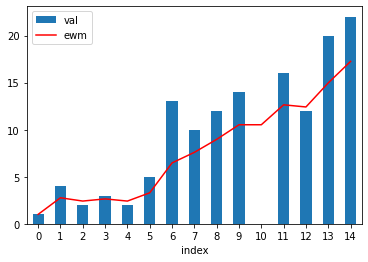

In [116]:
df2= df.assign(ewm=df['val'].ewm(alpha=0.3).mean())
ax = df.plot(kind='bar',x='index', y='val')
ax2=df2.plot(kind='line', x='index', y='ewm', color='red', ax=ax)
plt.show()

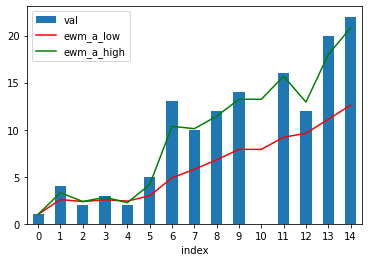

In [117]:
#alpha에 따른 차이 alpha=평활계수
#alpha가 클수록 더 큰 변화에 민감, alpha가 작을수록 평활한 그래프가 생성
df2 =df.assign(ewm_a_low=df['val'].ewm(alpha=0.1).mean())
df3 =df.assign(ewm_a_high=df['val'].ewm(alpha=0.7).mean())
ax = df.plot(kind='bar',x='index',y='val') 
ax2= df2.plot(kind='line',x='index', y='ewm_a_low', color='red', ax=ax) # alpha=0.1 은 적색
ax3= df3.plot(kind='line',x='index', y='ewm_a_high', color='green', ax=ax) # alpha=0.7 은 녹색
plt.show()

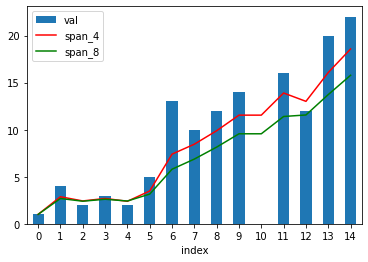

In [118]:
#span은 기간을 지정하여 평활계수를 계산하는 인수 , 계산기간이 길어질수록 a가 작아짐.
df2= df.assign(span_4 =df['val'].ewm(span=4).mean())
df3= df.assign(span_8 =df['val'].ewm(span=8).mean())
ax=df.plot(kind='bar', x='index', y='val')
ax2 =df2.plot(kind='line', x='index', y='span_4', color='red', ax=ax)
ax3 =df3.plot(kind='line', x='index', y='span_8', color='green', ax=ax)
plt.show()

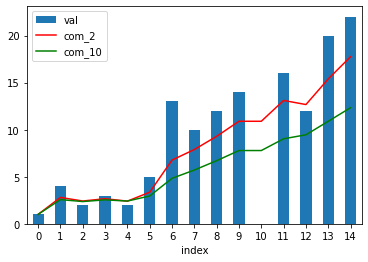

In [119]:
#com인수의 사용, 질량중심 감쇠법으로 평활계수 계산
df2 = df.assign(com_2=df['val'].ewm(com=2).mean())
df3 = df.assign(com_10=df['val'].ewm(com=10).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='com_2', color='red', ax=ax)
ax3= df3.plot(kind='line',x='index', y='com_10', color='green', ax=ax)
plt.show()

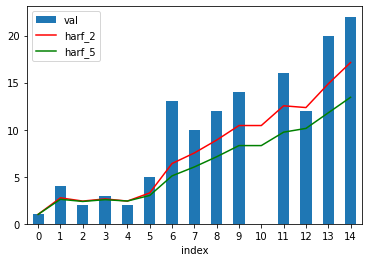

In [120]:
#halflife인수의 사용
df2 = df.assign(harf_2=df['val'].ewm(halflife=2).mean())
df3 = df.assign(harf_5=df['val'].ewm(halflife=5).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='harf_2', color='red', ax=ax)
ax3= df3.plot(kind='line',x='index', y='harf_5', color='green', ax=ax)
plt.show()

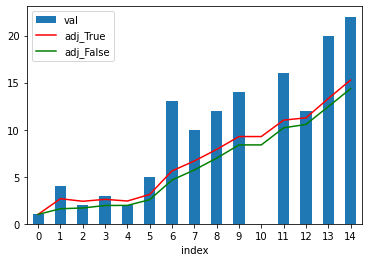

In [121]:
#adjust인수의 사용, 상대적 가중치의 불균형을 해소하기위해 조정계수로 나눌지의 여부
# 대체로 값이 많을수록 adjust하는 것이 유리
df2 = df.assign(adj_True=df['val'].ewm(alpha=0.2,adjust=True).mean())
df3 = df.assign(adj_False=df['val'].ewm(alpha=0.2,adjust=False).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='adj_True', color='red', ax=ax)
ax3= df3.plot(kind='line',x='index', y='adj_False', color='green', ax=ax)
plt.show()

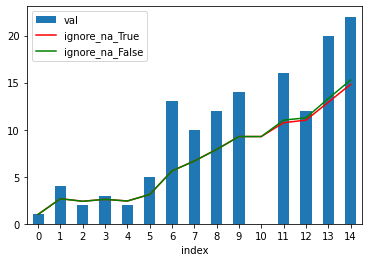

In [122]:
#ignore_na인수의 사용, 결측치가 존재할 경우 가중치를 어떻게 설정할지 정하는 인수
df2 = df.assign(ignore_na_True=df['val'].ewm(alpha=0.2,ignore_na=True).mean())
df3 = df.assign(ignore_na_False=df['val'].ewm(alpha=0.2,ignore_na=False).mean())
ax = df.plot(kind='bar',x='index',y='val')
ax2= df2.plot(kind='line',x='index', y='ignore_na_True', color='red', ax=ax)
ax3= df3.plot(kind='line',x='index', y='ignore_na_False', color='green', ax=ax)
plt.show()

In [123]:
#method인수의 사용, single=한줄씩, table=전체테이블을 한번에 계산
import numba
print(df['val'].ewm(alpha=0.2).mean(engine='numba'))

0      1.000000
1      2.666667
2      2.393443
3      2.598916
4      2.420752
5      3.119872
6      5.620269
7      6.672800
8      7.903410
9      9.269400
10     9.269400
11    11.014705
12    11.255896
13    13.304608
14    15.274352
Name: val, dtype: float64


In [124]:
print(df['val'].ewm(alpha=0.2, method='table').mean(engine='numba'))

TypeError: ewm() got an unexpected keyword argument 'method'

# 3. 함수 적용

3-1. 축 기준(apply)
* dataframe에 함수를 적용하여 반환하는 메서드
* 함수에 전달되는 객체는 series 형식
* dataframe의 index(axis=0)이냐 columns(axis=1)이냐에 따라 다르다.
* 최종반환 유형은 적용된 함수에 따라 정해지지만 result_type을 지정하여 변경이 가능
* function : 각 행이나 열에 적용할 함수
* axis : 0:row, 1:columns
* row : {True : ndarray, False: Series 형태로 전달.} 기본적으로 series
* result_type : {expand / reduce / broadcast}반환값의 형태를 결정, expand : 배열 형태를 기준으로 열 확장(기본 인덱스로), reduce : 그대로 series형태로 반환
- broadcast인 경우 기존 열 형식대로 확장하여 반환(열의 수가 같아야 한다.)

In [125]:
col = ['col1', 'col2', 'col3']
row = ['row1', 'row2', 'row3']
data = [[1,2,3], [4,5,6], [7,8,9]]
df=pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [126]:
#func의 성질에 따른 차이
print(df.apply(np.sqrt))

          col1      col2      col3
row1  1.000000  1.414214  1.732051
row2  2.000000  2.236068  2.449490
row3  2.645751  2.828427  3.000000


In [127]:
print(df.apply(np.sum))

col1    12
col2    15
col3    18
dtype: int64


In [128]:
#axis=0인 경우 index(행)에 대해 연산 수행, axis=1인 경우 columns(열)
print(df.apply(np.prod, axis=0))

col1     28
col2     80
col3    162
dtype: int64


In [129]:
print(df.apply(np.prod, axis=1))

row1      6
row2    120
row3    504
dtype: int64


In [130]:
#result_type에 따른 차이 : lambda를 사용하여 기존 dataframe에 [1.2.3]객체를 apply
print(df.apply(lambda x : [1,2,3]))

      col1  col2  col3
row1     1     1     1
row2     2     2     2
row3     3     3     3


In [131]:
#result_type = 'expand'일 때 func를 기준으로 확장하여 columns를 지정함.
print(df.apply(lambda x : [1,2,3], axis=1, result_type = 'expand'))

      0  1  2
row1  1  2  3
row2  1  2  3
row3  1  2  3


In [132]:
#result_type = 'reduce'인 경우 : func기준으로 축소하여 columns없이 series객체로 반환
print(df.apply(lambda x : [1,2,3], axis=1, result_type='reduce'))

row1    [1, 2, 3]
row2    [1, 2, 3]
row3    [1, 2, 3]
dtype: object


In [133]:
#result_type : broadcast인 경우 : func를 기준으로 확장하되, columns는 기존 dataframe의 것을 사용한다.
print(df.apply(lambda x: [1,2,3], axis=1, result_type ='broadcast'))

      col1  col2  col3
row1     1     2     3
row2     1     2     3
row3     1     2     3


3-2. 요소별(applymap)
* 객체의 각 요소에 함수를 적용하는 메서드
* apply메서드와 다르게 dataframe의 각 요소 하나하나에 함수를 적ㅇ용하여 스칼라 값을 반환한다.
* func : 단일 값을 반환하는 함수
* na_action : {None / ignore} NaN의 무시 여부

In [134]:
col=['col1', 'col2', 'col3']
row=['row1', 'row2', 'row3']
data = [[1,2,3], [4,5,6], [7,pd.NA,9]]
df= pd.DataFrame(data=data, index=row, columns=col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7  <NA>     9


In [135]:
print(df.applymap(lambda x : x**2, na_action = 'ignore'))

      col1  col2  col3
row1     1     4     9
row2    16    25    36
row3    49  <NA>    81


3-3. 함수내 함수 연속적용(pipe)
* pipe 메서드 : 함수를 연속적으로 사용할 때 유용한 메서드
* 함수가 인수를 사용할 때 pipe메서드를 사용하면 보다 직관적으로 적용할 수 있따.
* df.pipe(func, args, kwargs)
* func : 함수
* arg : 함수의 인수
* kwargs : dict 형태의 함수의 인수

In [136]:
org_data = pd.DataFrame({'info': ['삼성전자/3/70000', 'SK하이닉스/2/100000']})
print(org_data)

              info
0     삼성전자/3/70000
1  SK하이닉스/2/100000


In [137]:
def code_name(data):
    result = pd.DataFrame(columns=['name', 'count', 'price'])
    df = pd.DataFrame(list(data['info'].str.split('/'))) #/로 구분하여 문자열 나누어 리스트에 넣음
    result['name'] = df[0]
    result['count'] = df[1]
    result['price'] = df[2]
    result = result.astype({'count': int, 'price': int})
    return result

print(code_name(org_data))

     name  count   price
0    삼성전자      3   70000
1  SK하이닉스      2  100000


In [138]:
def value_cal(data, unit=''):
    result = pd.DataFrame(columns=['name', 'value'])
    result['name'] = data['name']
    result['value'] = data['count']*data['price']
    result = result.astype({'value':str})
    result['value'] = result['value']+unit
    return(result)

input = code_name(org_data)
print(value_cal(input, '원'))

     name    value
0    삼성전자  210000원
1  SK하이닉스  200000원


In [139]:
#pipe 메서드를 사용하지 않는 경우
print(value_cal(code_name(org_data), '원'))

     name    value
0    삼성전자  210000원
1  SK하이닉스  200000원


In [141]:
print(org_data.pipe(code_name).pipe(value_cal,'원'))

     name    value
0    삼성전자  210000원
1  SK하이닉스  200000원


3-4. 함수연속적용_축별(aggregate, agg)
* agg메서드는 apply와 비슷하게 함수를 적용하는 메서드
* 여러 개의 함수를 동시에 적용할 수 있다.

In [143]:
df = pd.DataFrame([[1,4,7], [2,5,8], [3,6,9]])
print(df)

   0  1  2
0  1  4  7
1  2  5  8
2  3  6  9


In [144]:
#입력되는 함수의 형태에 따라 입력함수로는 먼저 np.함수 형태나 그냥 문자열 형태로의 입력 가능
ex1 = df.agg(np.prod)
print(ex1)

0      6
1    120
2    504
dtype: int64


In [145]:
#문자열일 경우
ex2= df.agg('prod')
print(ex2)

0      6
1    120
2    504
dtype: int64


In [146]:
# lambda함수나 사용자 정의 함수를 사용할 수 있다.
ex3 = df.agg([lambda x : min(x) * max(x)])
print(ex3)

          0   1   2
<lambda>  3  24  63


In [147]:
def func_sub(input):
    return max(input)-min(input)
ex4=df.agg([func_sub, 'sum'])
print(ex4)

          0   1   2
func_sub  2   2   2
sum       6  15  24


In [148]:
def func_sub(input):
    return max(input)-min(input)
func_sub.__name__ = '내함수'
ex5 = df.agg([func_sub, 'sum'])
print(ex5)

     0   1   2
내함수  2   2   2
sum  6  15  24


In [149]:
#여러 함수를 동시에 적용하는 경우
ex6 = df.agg(['min', 'max', 'sum', 'prod'])
print(ex6)

      0    1    2
min   1    4    7
max   3    6    9
sum   6   15   24
prod  6  120  504


In [150]:
ex7 = df.agg({2 : 'sum', 0 : 'max', 1:'min'})
print(ex7)

2    24
0     3
1     4
dtype: int64


In [151]:
ex8 = df.agg({0:['sum', 'prod'], 1:['max', 'min'], 2:'mean'})
print(ex8)

        0    1    2
sum   6.0  NaN  NaN
prod  6.0  NaN  NaN
max   NaN  6.0  NaN
min   NaN  4.0  NaN
mean  NaN  NaN  8.0


In [152]:
ex2 = df.agg('prod', axis=0)
print(ex2)

0      6
1    120
2    504
dtype: int64


In [153]:
ex3 = df.agg('prod', axis=1)
print(ex3)

0     28
1     80
2    162
dtype: int64


3-5. 함수연속적용_요소별(transform)
* agg와 비슷하게 함수를 적용하는 메서드
* 단일 요소별로 함수를 동시에 적용할 수 있다는 장점이 있다.
* func : 함수
* axis : 0=행, 1=열
* arg : 함수의 인수
* kwargs : dict형태의 함수의 인수

In [154]:
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data=[[10,40,70],[20,50,80],[30,60,90]],index=row,columns=col)
print(df)

      col1  col2  col3
row1    10    40    70
row2    20    50    80
row3    30    60    90


In [155]:
#입력되는 함수의 형태에 따라
ex1 = df.transform(np.sqrt)
print(ex1)

          col1      col2      col3
row1  3.162278  6.324555  8.366600
row2  4.472136  7.071068  8.944272
row3  5.477226  7.745967  9.486833


In [156]:
ex2 = df.transform('sqrt')
print(ex2)

          col1      col2      col3
row1  3.162278  6.324555  8.366600
row2  4.472136  7.071068  8.944272
row3  5.477226  7.745967  9.486833


In [157]:
ex3 = df.transform(lambda x : np.sqrt(x))
print(ex3)

          col1      col2      col3
row1  3.162278  6.324555  8.366600
row2  4.472136  7.071068  8.944272
row3  5.477226  7.745967  9.486833


In [158]:
#여러 함수를 동시에 적용하는 경우
#list나 dict형태로 func값을 입력하는 경우 여러 함수를 동시에 적용할 수 있다.
ex4 = df.transform(['exp', 'sqrt'])
print(ex4)

              col1                    col2                    col3          
               exp      sqrt           exp      sqrt           exp      sqrt
row1  2.202647e+04  3.162278  2.353853e+17  6.324555  2.515439e+30  8.366600
row2  4.851652e+08  4.472136  5.184706e+21  7.071068  5.540622e+34  8.944272
row3  1.068647e+13  5.477226  1.142007e+26  7.745967  1.220403e+39  9.486833


In [159]:
ex5 = df.transform({'col2' : 'exp', 'col1' : 'sqrt'})
print(ex5)

              col2      col1
row1  2.353853e+17  3.162278
row2  5.184706e+21  4.472136
row3  1.142007e+26  5.477226


3-6. 문자열 형식의 계산식 적용 (eval)
* eval메서드 : 파이썬의 eval과 동일
* df.eval(expr, inplace=False, kwargs)
* inplace : true / false계산된 값이 원본을 변경할지의 여부


In [160]:
data = [[1,2,3],[4,5,6],[7,8,9]]
col = ['col1','col2','col3']
row = ['row1','row2','row3']
df = pd.DataFrame(data = data, index = row, columns= col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [161]:
print(df.eval('col4=col1*col2-col3'))

      col1  col2  col3  col4
row1     1     2     3    -1
row2     4     5     6    14
row3     7     8     9    47


In [162]:
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [163]:
#inplace=True인 경우
# inplace=True로 할 경우 원본이 변경되는 것을 확인 할 수 있음.
#inplace=True로 할 경우 사본이 생성되지 않는다. print할 경우 None이 출력됨.
print(df.eval('col4 = col1*col2-col3', inplace=True))

None


In [164]:
print(df) #원본은 변경됨. 

      col1  col2  col3  col4
row1     1     2     3    -1
row2     4     5     6    14
row3     7     8     9    47


# 4. 인덱싱

4-1. 레이블기반_스칼라(at)
* 행, 열 값을 인수로 입력하여 변수에 할당함으로써 값을 가져올 수 있다.

In [168]:
df = pd.DataFrame([[1,2], [3,4]], index= ['row1','row2'], columns=['col1', 'col2'])
print(df)

      col1  col2
row1     1     2
row2     3     4


In [169]:
result = df.at['row1', 'col2']
print(result)

2


In [175]:
df1=df.copy()

In [177]:
df1.at['row2', 'col1'] = '변경'
print(df1)

ValueError: invalid literal for int() with base 10: '변경'

In [178]:
df.loc['row2'].at['col2']

4

4-2. 레이블기반_데이터(loc)

In [179]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], index=['row1', 'row2','row3'], columns=['col1','col2','col3'])
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [180]:
result = df.loc['row1']
print(result)

col1    1
col2    2
col3    3
Name: row1, dtype: int64


In [181]:
result = df.loc[['row1', 'row3']]
print(result)

      col1  col2  col3
row1     1     2     3
row3     7     8     9


In [182]:
result = df.loc['row2', 'col2']
print(result)

5


In [183]:
result = df.loc['row1' : 'row3', 'col2']
print(result)

row1    2
row2    5
row3    8
Name: col2, dtype: int64


In [185]:
bool = [False, True, False]
result = df.loc[bool]
print(result)

      col1  col2  col3
row2     4     5     6


In [186]:
result = df.loc[df['col3'] > 5]
print(result)

      col1  col2  col3
row2     4     5     6
row3     7     8     9


In [187]:
result = df.loc[df['col3'] > 5, ['col2']]
print(result)

      col2
row2     5
row3     8


In [188]:
result = df.loc[lambda df : df['col2'] == 5]
print(result)

      col1  col2  col3
row2     4     5     6


In [189]:
df.loc[ ['row1', 'row3'], ['col3']] = 'A'
print(df)

      col1  col2 col3
row1     1     2    A
row2     4     5    6
row3     7     8    A


In [190]:
df.loc[['row1']] = 'A'
print(df)

     col1 col2 col3
row1    A    A    A
row2    4    5    6
row3    7    8    A


In [191]:
df.loc[:, ['col3']]='B'
print(df)

     col1 col2 col3
row1    A    A    B
row2    4    5    B
row3    7    8    B


In [196]:
df1= pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], index=['row1', 'row2','row3'], columns=['col1','col2','col3'])
print(df1)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [197]:
df1.loc[df1['col2'] > 3] = 'A'
print(df1)

     col1 col2 col3
row1    1    2    3
row2    A    A    A
row3    A    A    A


4-3. 정수기반_스칼라(iat)
* iat 함수는 iloc함수와 같이 정수 기반으로 인덱싱한다.

In [198]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], index=['row1', 'row2', 'row3'], columns = ['col1', 'col2', 'col3'])
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [199]:
result = df.iat[1,2] #row=1, column=2
print(result)

6


In [200]:
df.iat[1,2]='A'
print(df)

      col1  col2 col3
row1     1     2    3
row2     4     5    A
row3     7     8    9


4-4. 정수기반_데이터(iloc)

In [201]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], index=['row1', 'row2', 'row3'], columns=['col1', 'col2', 'col3'])
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9


In [202]:
result = df.iloc[0]
print(result)

col1    1
col2    2
col3    3
Name: row1, dtype: int64


In [203]:
result = df.iloc[[0,2]]
print(result)

      col1  col2  col3
row1     1     2     3
row3     7     8     9


In [204]:
result = df.iloc[1:2]
print(result)

      col1  col2  col3
row2     4     5     6


In [205]:
bool_list = [True, False, True]
result = df.iloc[bool_list]
print(result)

      col1  col2  col3
row1     1     2     3
row3     7     8     9


In [206]:
result = df.iloc[lambda x : x.index =='row3']
print(result)

      col1  col2  col3
row3     7     8     9


4-5. 앞에서 n행 인덱싱(head)

In [207]:
data = np.random.randint(10, size=(10,10))
df = pd.DataFrame(data=data)
print(df)

   0  1  2  3  4  5  6  7  8  9
0  5  0  1  5  9  3  0  5  0  1
1  2  4  2  0  3  2  0  7  5  9
2  0  2  7  2  9  2  3  3  2  3
3  4  1  2  9  1  4  6  8  2  3
4  0  0  6  0  6  3  3  8  8  8
5  2  3  2  0  8  8  3  8  2  8
6  4  3  0  4  3  6  9  8  0  8
7  5  9  0  9  6  5  3  1  8  0
8  4  9  6  5  7  8  8  9  2  8
9  6  6  9  1  6  8  8  3  2  3


In [208]:
print(df.head(3))

   0  1  2  3  4  5  6  7  8  9
0  5  0  1  5  9  3  0  5  0  1
1  2  4  2  0  3  2  0  7  5  9
2  0  2  7  2  9  2  3  3  2  3


In [209]:
print(df.head(-3)) #뒤에 3개 제외해라

   0  1  2  3  4  5  6  7  8  9
0  5  0  1  5  9  3  0  5  0  1
1  2  4  2  0  3  2  0  7  5  9
2  0  2  7  2  9  2  3  3  2  3
3  4  1  2  9  1  4  6  8  2  3
4  0  0  6  0  6  3  3  8  8  8
5  2  3  2  0  8  8  3  8  2  8
6  4  3  0  4  3  6  9  8  0  8


In [210]:
check = df.head(3)
print(check.index)

RangeIndex(start=0, stop=3, step=1)


4-6. 뒤에서 n행 인덱싱(tail)

In [211]:
data = np.random.randint(10, size=(10,10))
df = pd.DataFrame(data=data)
print(df)

   0  1  2  3  4  5  6  7  8  9
0  6  3  6  5  7  0  8  4  6  5
1  8  2  3  9  7  5  3  4  5  3
2  3  7  9  9  9  7  3  2  3  9
3  7  7  5  1  2  2  8  1  5  8
4  4  0  2  5  5  0  8  1  1  0
5  3  8  8  4  4  0  9  3  7  3
6  2  1  1  2  1  4  2  5  5  5
7  2  5  7  7  6  1  6  7  2  3
8  1  9  5  9  9  2  0  9  1  9
9  0  6  0  4  8  4  3  3  8  8


In [212]:
print(df.tail(3))

   0  1  2  3  4  5  6  7  8  9
7  2  5  7  7  6  1  6  7  2  3
8  1  9  5  9  9  2  0  9  1  9
9  0  6  0  4  8  4  3  3  8  8


In [213]:
print(df.tail(-3)) #앞에 있는 3개의 행 제외

   0  1  2  3  4  5  6  7  8  9
3  7  7  5  1  2  2  8  1  5  8
4  4  0  2  5  5  0  8  1  1  0
5  3  8  8  4  4  0  9  3  7  3
6  2  1  1  2  1  4  2  5  5  5
7  2  5  7  7  6  1  6  7  2  3
8  1  9  5  9  9  2  0  9  1  9
9  0  6  0  4  8  4  3  3  8  8


In [214]:
check =df.tail(3)
print(check.index)

RangeIndex(start=7, stop=10, step=1)


4-7. Multi index의 경우

In [215]:
index_tuples = [('row1', 'val1'), ('row1', 'val2'), ('row2', 'val1'), ('row2', 'val2'), ('row2', 'val3'), ('row3', 'val2'),('row3', 'val3')]
values = [[1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15], [16,17,18], [19,20,21]]
index = pd.MultiIndex.from_tuples(index_tuples)
df = pd.DataFrame(values, columns = ['col1', 'col2', 'col3'], index=index)
print(df)

           col1  col2  col3
row1 val1     1     2     3
     val2     4     5     6
row2 val1     7     8     9
     val2    10    11    12
     val3    13    14    15
row3 val2    16    17    18
     val3    19    20    21


In [216]:
result = df.loc['row2']
print(result)

      col1  col2  col3
val1     7     8     9
val2    10    11    12
val3    13    14    15


In [217]:
result = df.loc[('row2', 'val2')]
print(result)

col1    10
col2    11
col3    12
Name: (row2, val2), dtype: int64


In [218]:
result = df.loc[[('row2', 'val2')]]
print(result)

           col1  col2  col3
row2 val2    10    11    12


In [219]:
result = df.loc[('row2', 'val2'), 'col3']
print(result)

12


In [220]:
result = df.loc[('row1', 'val2') : ('row3', 'val2')]
print(result)

           col1  col2  col3
row1 val2     4     5     6
row2 val1     7     8     9
     val2    10    11    12
     val3    13    14    15
row3 val2    16    17    18


# 5. 비교 & 필터링

5-1. 초과, 미만, 이상, 이하, 같음, 다름
- other : 스칼라, 시퀀스, series, dataframe, list등이 올 수 있다. 비교하고자 하는 값
- axis : 0 =헹. 1=열 비교할 테이블
- levle : 멀티 인덱서 사용시 비교할 레이블의 레벨

In [221]:
col = ['col1','col2','col3']
row = ['A','B','C']
df = pd.DataFrame(data=[[10,20,10],
                        [80,30,60],
                        [20,10,70]],index=row,columns=col)

In [222]:
print(df)

   col1  col2  col3
A    10    20    10
B    80    30    60
C    20    10    70


In [223]:
#스칼라 값과의 비교
print(df.eq(10))

    col1   col2   col3
A   True  False   True
B  False  False  False
C  False   True  False


In [224]:
print(df.ne(20))

    col1   col2  col3
A   True  False  True
B   True   True  True
C  False   True  True


In [225]:
#series와의 비교
s1=pd.Series([10,30], index=['col1', 'col3'])
print(df.gt(s1)) #grater than 

    col1   col2   col3
A  False  False  False
B   True  False   True
C   True  False   True


In [226]:
s2 = pd.Series([10], index=['col4'])
print(df.lt(s2))

    col1   col2   col3   col4
A  False  False  False  False
B  False  False  False  False
C  False  False  False  False


In [227]:
print(df.le([10,20,30], axis='columns')) #less than 

    col1   col2   col3
A   True   True   True
B  False  False  False
C  False   True  False


In [228]:
print(df.le([10,20,30], axis = 'index')) #less than

    col1   col2   col3
A   True  False   True
B  False  False  False
C   True   True  False


In [229]:
df2 = pd.DataFrame([[50], [50], [50]], index=row, columns=['col1'])
print(df2)

   col1
A    50
B    50
C    50


In [230]:
print(df.ge(df2)) #col1에 대해서 각각 50, 50, 50 이상이면 True

    col1   col2   col3
A  False  False  False
B   True  False  False
C  False  False  False


In [236]:
# 멀티 인덱스의 사용(level인수)
row_mul = [['U', 'U', 'U', 'D','D', 'D'], ['A','B','C','A','B','C']]
col = ['col1', 'col2', 'col3']
df_mul = pd.DataFrame(data =[[10,20,10],
                            [80,30,60],
                            [20,10,70],
                            [30,70,60],
                            [10,90,40],
                            [50,30,80]], index=row_mul, columns=col)
print(df_mul)

     col1  col2  col3
U A    10    20    10
  B    80    30    60
  C    20    10    70
D A    30    70    60
  B    10    90    40
  C    50    30    80


In [238]:
#level 선택
print(df.ge(df_mul, level=1))

      col1   col2   col3
U A   True   True   True
  B   True   True   True
  C   True   True   True
D A  False  False  False
  B   True  False   True
  C  False  False  False


5-2. dtype기반 열 선택(select_dtypes)
- select_dtypes함수는 열에 포함된 데이터들을 type기준으로 인덱싱할 수 있음.
- select_dtypes(include=None, exclude=None) 형태
- include : 넣은 값을 포함
- exclude : 넣은 값을 제외한 columns을 dataframe형태로 반환

In [242]:
col1 = [1, 2, 3, 4, 5]
col2 = ['one', 'two', 'three', 'four', 'five']
col3 = [1.5, 2.5, 3.5, 4.5, 5.5]
col4 = [True, False, False, True, True]
df = pd.DataFrame({"col1": col1, "col2": col2, "col3": col3, "col4": col4})
print(df)

   col1   col2  col3   col4
0     1    one   1.5   True
1     2    two   2.5  False
2     3  three   3.5  False
3     4   four   4.5   True
4     5   five   5.5   True


In [243]:
print(df.dtypes)

col1      int64
col2     object
col3    float64
col4       bool
dtype: object


In [247]:
#include 사용 #include에 포함될 typde입력해서 해당 type열만 반환하기
result = df.select_dtypes(include=['float','bool'])
print(result)

   col3   col4
0   1.5   True
1   2.5  False
2   3.5  False
3   4.5   True
4   5.5   True


In [249]:
result = df.select_dtypes(exclude = ['int64'])
print(result)

    col2  col3   col4
0    one   1.5   True
1    two   2.5  False
2  three   3.5  False
3   four   4.5   True
4   five   5.5   True


In [252]:
#include, exclude같이
result = df.select_dtypes(include = ['float', 'object'], exclude=['int64'])
print(result)

    col2  col3
0    one   1.5
1    two   2.5
2  three   3.5
3   four   4.5
4   five   5.5


5-3. 임계값 적용(clip)
* series, dataframe에 대해서 요소들의 범위를 제한
* 상한성과 하한선을 임계값으로 정해서 임계값 밖의 값을 임계값으로 변경
* lower : 하한선
* upper : 상한값
* axis : 계산할 기준이 되는 레이블
* inplace : 제자리에서 계산할지 여부

In [255]:
col =['col1', 'col2', 'col3']
rpw = ['row1', 'row2', 'row3']
data = [[-7,3,9],
       [6,-8,1],
       [-3, 0,-7]]
df = pd.DataFrame(data, row, col)
print(df)

   col1  col2  col3
A    -7     3     9
B     6    -8     1
C    -3     0    -7


In [256]:
print(df.clip(-4,5)) #lower = -4, upper =5

   col1  col2  col3
A    -4     3     5
B     5    -4     1
C    -3     0    -4


In [257]:
# 임계값을 series로 설정
s = pd.Series(data=[1,2,3], index=row)
print(s)

A    1
B    2
C    3
dtype: int64


In [258]:
print(df.clip(-s, s, axis=0)) #row1 = -1~1, row2=-2~2, row3=-3~3

   col1  col2  col3
A    -1     1     1
B     2    -2     1
C    -3     0    -3


5-4. 레이블 필터링
* dataframe.filter(items=None, like+None, regex=None, axis=None)
* items : 이름으로 필터링하는 경우, 리스트형태로 입력
* like : str로 필터링, 해당 문자열이 포함된 경우 반환
* regex : 정규표현식을 이용해 필터링
* axis : 0=행, 1=열

In [259]:
col  = ['alpha','beta','gamma','delta','epsilon']
row  = ['sigma','omega','lambda']
data = [[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]]
df = pd.DataFrame(data,row,col)
print(df)

        alpha  beta  gamma  delta  epsilon
sigma       1     2      3      4        5
omega       6     7      8      9       10
lambda     11    12     13     14       15


In [260]:
#items인수 사용하는 경우
print(df.filter(items=['alpha', 'delta']))

        alpha  delta
sigma       1      4
omega       6      9
lambda     11     14


In [261]:
print(df.filter(items=['omega'], axis=0))

       alpha  beta  gamma  delta  epsilon
omega      6     7      8      9       10


In [262]:
#like 인수 사용하는 경우
print(df.filter(like='ta'))

        beta  delta
sigma      2      4
omega      7      9
lambda    12     14


In [264]:
#regex인수를 사용하는 경우
print(df.filter(regex='[mn]'))

        gamma  epsilon
sigma       3        5
omega       8       10
lambda     13       15


In [265]:
print(df.filter(regex='^g'))

        gamma
sigma       3
omega       8
lambda     13


In [266]:
print(df.filter(regex='a$')) #$   :  $앞에 있는 문자로 끝나는 문자열

        alpha  beta  gamma  delta
sigma       1     2      3      4
omega       6     7      8      9
lambda     11    12     13     14


5-5. 샘플 추출
* dataframe이나 series에서 무작위로 몇개의 값(레이블)을 출력하는 메서드
* n : 추출할 갯수
* frac : 추출할 비율
* replace : 중복추출의 허용 여부
* weight : 가중치
* random_state : 랜덤 추출한 값에 시드를 설정할 수 있음. 원하는 값을 설정하면, 항상 같은 결과 출력
* axis : 0=행, 1=열
* ignore_index : index의 무시 여부

In [267]:
col = ['col1', 'col2','col3']
row = ['row1', 'row2', 'row3', 'row4', 'row5']
data = [[1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15]]
df = pd.DataFrame(data, row, col)
print(df)

      col1  col2  col3
row1     1     2     3
row2     4     5     6
row3     7     8     9
row4    10    11    12
row5    13    14    15


In [268]:
print(df.sample(2)) #원하는 갯수의 추출 가능

      col1  col2  col3
row1     1     2     3
row5    13    14    15


In [269]:
print(df.sample(10, replace=True))

      col1  col2  col3
row1     1     2     3
row4    10    11    12
row1     1     2     3
row3     7     8     9
row2     4     5     6
row1     1     2     3
row5    13    14    15
row1     1     2     3
row4    10    11    12
row5    13    14    15


In [270]:
print(df.sample(frac=0.4)) #frac = 전체에 대한 추출 비율

      col1  col2  col3
row4    10    11    12
row3     7     8     9


In [271]:
#weights를 통한 가중치의 사용
s =pd.Series(data=[10,10,3,3,1], index=row)
print(s)

row1    10
row2    10
row3     3
row4     3
row5     1
dtype: int64


In [274]:
#가중치가 높은 row1, row2가 추출된다.
print(df.sample(2, weights=s))

      col1  col2  col3
row2     4     5     6
row1     1     2     3


In [275]:
#rondom_state : 원하는 값을 설정하여 출력 결과를 동일하게 다시 출력하는 것이 가능하다.
print(df.sample(5, random_state=7))

      col1  col2  col3
row1     1     2     3
row4    10    11    12
row3     7     8     9
row2     4     5     6
row5    13    14    15


In [276]:
print(df.sample(5, random_state=7))

      col1  col2  col3
row1     1     2     3
row4    10    11    12
row3     7     8     9
row2     4     5     6
row5    13    14    15


In [277]:
print(df.sample(3, ignore_index=True))

   col1  col2  col3
0    10    11    12
1     7     8     9
2     4     5     6


# 6. 결측제어

6-1. 결측값 확인
* isna = insull
* notna = notnull

In [279]:
col  = ['col1','col2','col3','col4']
row  = ['row1','row2','row3']
data = [[1,2,pd.NA,4],
        [np.nan,6,7,8],
        [9,10,11,None]]
df = pd.DataFrame(data,row,col)
print(df)

      col1  col2  col3  col4
row1   1.0     2  <NA>   4.0
row2   NaN     6     7   8.0
row3   9.0    10    11   NaN


In [280]:
#결측값이 있냐
print(df.isna())

       col1   col2   col3   col4
row1  False  False   True  False
row2   True  False  False  False
row3  False  False  False   True


In [281]:
print(df.notna())

       col1  col2   col3   col4
row1   True  True  False   True
row2  False  True   True   True
row3   True  True   True  False


6-2. 결측값 제거
* dataframe내의 결측값이 포함된 레이블을 제거하는 메서드
* axis :
* how : any=존재하면 제거, all = 모두 결측지이면 제거
* thresh : 결측값이 아닌 값이 몇 개 미만일 경우메나 적용시키는 인수 만약에 3이면 결측값이 아닌 값이 3개 미만일 경우에만 dropna메서드를 수행한다. 
* subset : dropna 메서드를 수행할 레이블지정
* inplace : 원본을 변경할지의 여부

In [282]:
col  = ['col1','col2','col3','col4','col5']
row  = ['row1','row2','row3','row4']
data = [[1,2,3,pd.NA,5],[6,pd.NA,8,pd.NA,10],[11,12,13,14,15],[pd.NA,pd.NA,pd.NA,pd.NA,pd.NA]]
df = pd.DataFrame(data,row,col)
print(df)

      col1  col2  col3  col4  col5
row1     1     2     3  <NA>     5
row2     6  <NA>     8  <NA>    10
row3    11    12    13    14    15
row4  <NA>  <NA>  <NA>  <NA>  <NA>


In [283]:
#axis값에 따른 결측지 제거 수행
print(df.dropna(axis=0))

     col1 col2 col3 col4 col5
row3   11   12   13   14   15


In [284]:
print(df.dropna(axis=1))

Empty DataFrame
Columns: []
Index: [row1, row2, row3, row4]


In [285]:
#how로 연산기준 정할 경우
print(df.dropna(how='any'))

     col1 col2 col3 col4 col5
row3   11   12   13   14   15


In [286]:
print(df.dropna(how='all'))

     col1  col2 col3  col4 col5
row1    1     2    3  <NA>    5
row2    6  <NA>    8  <NA>   10
row3   11    12   13    14   15


In [288]:
#thresh를 이용할 떄
print(df.dropna(thresh=3)) #정상값 3개 이하이면 지우지 말것

     col1  col2 col3  col4 col5
row1    1     2    3  <NA>    5
row2    6  <NA>    8  <NA>   10
row3   11    12   13    14   15


In [289]:
print(df.dropna(thresh=4))

     col1 col2 col3  col4 col5
row1    1    2    3  <NA>    5
row3   11   12   13    14   15


In [290]:
#subset인수를 통한 레이블 지정 : 리스트형태의 값을 입력함으로써 결측지 제거를 수행할 
#레이블을 지정할 수 있다.
print(df.dropna(subset = ['col1', 'col2']))

     col1 col2 col3  col4 col5
row1    1    2    3  <NA>    5
row3   11   12   13    14   15


In [291]:
#inplace 원본 수정 할거냐 마냐
df.dropna(inplace=True)
print(df)

     col1 col2 col3 col4 col5
row3   11   12   13   14   15


6-3. 결측값 없는 인덱스 확인
* first_valid_index 메서드의 경우 처음으로 결측치가 아닌 값이 나오는 행의 인덱스 출력
* last_valid_index 메서드의 경우 마지막으로 결측치가 아닌 값이 나오는 행의 인덱스 출력
* 결측값만 있는 행은 무시한다.

In [292]:
col  = ['col1','col2']
row  = ['row1','row2','row3','row4','row5']
data = [[np.nan,np.nan],[pd.NA,4],[pd.NA,pd.NaT],[5,6],[np.nan,pd.NA]]
df = pd.DataFrame(data,row,col)
print(df)

      col1  col2
row1   NaN   NaN
row2  <NA>     4
row3  <NA>   NaT
row4     5     6
row5   NaN  <NA>


In [293]:
#first_valid_index
print(df.first_valid_index())

row2


In [294]:
print(df.last_valid_index())

row4


6-4. 결측값 변경(fillna / backfill / bfill / pad/ ffill)
* fillna : 데이터프레임에서 결측값을 원하는 값으로 변경하는 메서드

In [295]:
col  = ['col1','col2','col3','col4','col5']
row  = ['row1','row2','row3','row4','row5']
na = np.nan
data = [[na, 2,na, 4,na],
        [ 6, 7,na, 9,na],
        [11,na,na,14,15],
        [na,17,na,na,20],
        [na,22,na,na,25]]
df = pd.DataFrame(data,row,col)
print(df)

      col1  col2  col3  col4  col5
row1   NaN   2.0   NaN   4.0   NaN
row2   6.0   7.0   NaN   9.0   NaN
row3  11.0   NaN   NaN  14.0  15.0
row4   NaN  17.0   NaN   NaN  20.0
row5   NaN  22.0   NaN   NaN  25.0


In [296]:
#value 형식에 따른 사용
print(df.fillna('A'))

      col1  col2 col3  col4  col5
row1     A   2.0    A   4.0     A
row2   6.0   7.0    A   9.0     A
row3  11.0     A    A  14.0  15.0
row4     A  17.0    A     A  20.0
row5     A  22.0    A     A  25.0


In [298]:
dict = {'ool1' :'A', 'col2': 'B', 'col3':'C', 'col4':'D', 'col5' : 'E'}
print(df.fillna(value=dict))
df.fillna('A')

      col1  col2 col3  col4  col5
row1   NaN   2.0    C   4.0     E
row2   6.0   7.0    C   9.0     E
row3  11.0     B    C  14.0  15.0
row4   NaN  17.0    C     D  20.0
row5   NaN  22.0    C     D  25.0


,col1,col2,col3,col4,col5
row1,A,2.0,A,4.0,A
row2,6.0,7.0,A,9.0,A
row3,11.0,A,A,14.0,15.0
row4,A,17.0,A,A,20.0
row5,A,22.0,A,A,25.0


In [299]:
#bfill = 결측값 바로 아래값과 동일하게 설정된다.
print(df.fillna(method = 'bfill'))

      col1  col2  col3  col4  col5
row1   6.0   2.0   NaN   4.0  15.0
row2   6.0   7.0   NaN   9.0  15.0
row3  11.0  17.0   NaN  14.0  15.0
row4   NaN  17.0   NaN   NaN  20.0
row5   NaN  22.0   NaN   NaN  25.0


In [300]:
#결측값이 바로 위값과 동일하게 설정된다.
print(df.fillna(method ='ffill'))

      col1  col2  col3  col4  col5
row1   NaN   2.0   NaN   4.0   NaN
row2   6.0   7.0   NaN   9.0   NaN
row3  11.0   7.0   NaN  14.0  15.0
row4  11.0  17.0   NaN  14.0  20.0
row5  11.0  22.0   NaN  14.0  25.0


In [301]:
#limit인수 사용하는 경우 : 각 레이블값에 대해서 결측지 변경을 수행할 횟수
print(df.fillna('A', limit=2)) 
#행 기준일 때 왼쪽부터, 열 기준일 때 오른쪽부터

      col1  col2 col3  col4  col5
row1     A   2.0    A   4.0     A
row2   6.0   7.0    A   9.0     A
row3  11.0     A  NaN  14.0  15.0
row4     A  17.0  NaN     A  20.0
row5   NaN  22.0  NaN     A  25.0


In [302]:
print(df.fillna(0, downcast = 'infer')) #infer : float64 형태를 int64형태로

      col1  col2  col3  col4  col5
row1     0     2     0     4     0
row2     6     7     0     9     0
row3    11     0     0    14    15
row4     0    17     0     0    20
row5     0    22     0     0    25


In [303]:
df.fillna('A', inplace=True)
print(df)

      col1  col2 col3  col4  col5
row1     A   2.0    A   4.0     A
row2   6.0   7.0    A   9.0     A
row3  11.0     A    A  14.0  15.0
row4     A  17.0    A     A  20.0
row5     A  22.0    A     A  25.0


6-5. 결측값 없는 마지막 행 반환(asof)
* asof : 인덱스 기준으로 where이전에 결측치가 없는 마지막 행을 구한다.
* where : 기준이 되는 인덱스 값
* subset : 기준이 되는 열

In [306]:
row = [10,20,30,40,50,60]
n=np.NaN
data = {'A':[1,n,n,4,5,6],'B':[7,8,9,10,n,12]}
df = pd.DataFrame(data=data, index = row)
print(df)

      A     B
10  1.0   7.0
20  NaN   8.0
30  NaN   9.0
40  4.0  10.0
50  5.0   NaN
60  6.0  12.0


In [307]:
#기본적인 사용법
# where이 단일값이면 반환은 series 형태로 한다. subset을 입력하지 않으면 모든 열에 대해서 
#조건 만족함
print(df.asof(where=45))  #인덱스 45이전에 결측값없는 마지막 행
#결측치가 없는 마지막 행, where=기준 45기준으로 A열과 B열 모두 결측치가 없는 행은 40

A     4.0
B    10.0
Name: 45, dtype: float64


In [309]:
#입력값이 LIST인 경우
print(df.asof(where=[10,45,60]))

      A     B
10  1.0   7.0
45  4.0  10.0
60  6.0  12.0


In [310]:
#subset의 사용, 특정 열에 대해서만 만족하는 경우를 반환할 수 있따.
print(df.asof(where=[10,35,60], subset='A'))

      A     B
10  1.0   7.0
35  1.0   7.0
60  6.0  12.0


In [311]:
print(df.asof(where=[10,35,60], subset='B'))

      A     B
10  1.0   7.0
35  NaN   9.0
60  6.0  12.0
